<p><h1><font color = DarkBlue> Hitters Case Study </font></h1></b>

Major League Baseball Data from the 1986 and 1987 seasons. 

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

<h3>Importing the Required Libraries </h3>

In [1]:
## Decision tree (Regression) Hitters Case Study
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import mean_squared_error

In [2]:
Hitters = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/Hitters.csv", index_col=0)

In [3]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


<p><h2><font color = DarkBlue> Data Set Description </font></h2></p>

A data frame with 322 observations of major league players on the following 20 variables.

<ul><li><b>AtBat: </b> Number of times at bat in 1986 </li>

<li><b>Hits: </b> Number of hits in 1986 </li>

<li><b>HmRun: </b> Number of home runs in 1986 </li>

<li><b>Runs: </b> Number of runs in 1986 </li>

<li><b>RBI:  </b> Number of runs batted in in 1986 </li>

<li><b>Walks: </b> Number of walks in 1986 </li>

<li><b>Years: </b> Number of years in the major leagues </li>

<li><b>CAtBat: </b> Number of times at bat during his career </li>

<li><b>CHits: </b> Number of hits during his career </li>

<li><b>CHmRun: </b> Number of home runs during his career </li>

<li><b>CRuns: </b> Number of runs during his career </li>

<li><b>CRBI: </b> Number of runs batted in during his career </li>

<li><b>CWalks: </b> Number of walks during his career </li>

<li><b>League: </b> A factor with levels A and N indicating player's league at the end of 1986 </li>

<li><b>Division: </b> A factor with levels E and W indicating player's division at the end of 1986 </li>

<li><b>PutOuts: </b> Number of put outs in 1986 </li>

<li><b>Assists: </b> Number of assists in 1986 </li>

<li><b>Errors: </b> Number of errors in 1986 </li>

<li><b>Salary: </b> 1987 annual salary on opening day in thousands of dollars </li>

<li><b>NewLeague: </b> A factor with levels A and N indicating player's league at the beginning of 1987 </li>

<font color = purple><b> The dependent variable is salary </font></b>


In [4]:
Hitters.index.name = 'Player'

In [5]:
Hitters.shape

(322, 20)

In [6]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


<p><h3><font color = DarkBlue> Data Preprocessing </font></h3></p>

In [7]:
Hitters = Hitters.dropna()   # Removing Misssing values in salary column

In [8]:
Hitters.shape

(263, 20)

In [9]:
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

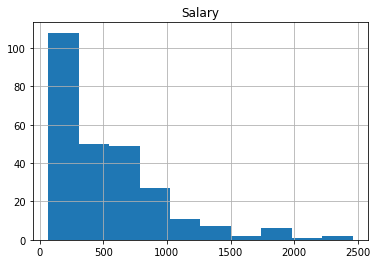

In [10]:
%matplotlib inline
Hitters.hist('Salary');

In [11]:
# convert Salary to log scale
Hitters.Salary = np.log(Hitters.Salary)

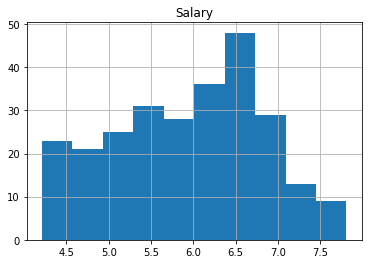

In [12]:
%matplotlib inline
Hitters.hist('Salary');

In [13]:
Hitters = pd.get_dummies(Hitters,columns=['League','Division','NewLeague'],drop_first=True)
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0


<p><h2><font color = DarkBlue> Creating Feature Matrix and Target Array </font></h2></p>

In [14]:
X = Hitters.copy()

In [15]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [16]:
del X['Salary']

In [17]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [18]:
y=Hitters.Salary
y.head()

Player
-Alan Ashby          6.163315
-Alvin Davis         6.173786
-Andre Dawson        6.214608
-Andres Galarraga    4.516339
-Alfredo Griffin     6.620073
Name: Salary, dtype: float64

In [19]:
X.shape, y.shape

((263, 19), (263,))

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape

(210, 19)

In [23]:
X_test.shape

(53, 19)

In [24]:
y_train.shape

(210,)

In [25]:
y_test.shape

(53,)

<h3>Building a Decision Tree model with "Hits" and "Years"</h3>

In [26]:
model2_var = DecisionTreeRegressor()

In [27]:
model2_var.fit(X_train[['Years','Hits']],y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
export_graphviz(model2_var,out_file='Regtree.dot',feature_names=X_train[['Years','Hits']].columns)

In [29]:
! dot -Tpng Regtree.dot -o Regtree.png

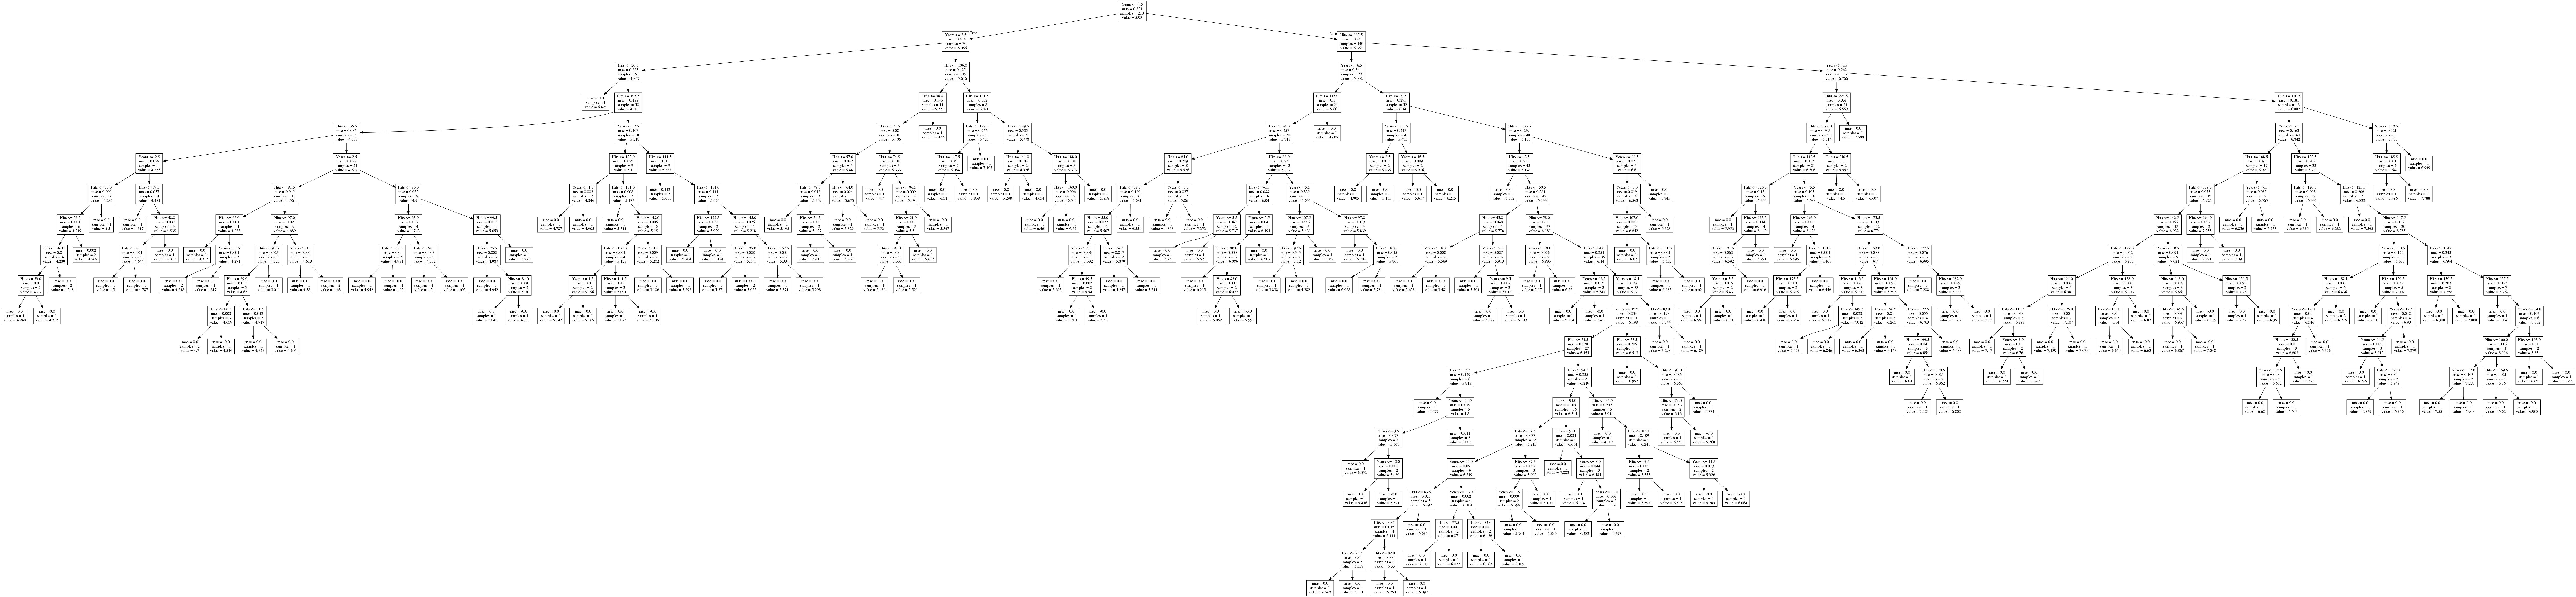

In [30]:
Image('Regtree.png')

In [31]:
model3_var = DecisionTreeRegressor(max_depth=2) #here max depth is hyperparameter

In [32]:
model3_var.fit(X_train[['Years','Hits']],y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
export_graphviz(model3_var,out_file='Regtree.dot',feature_names=X_train[['Years','Hits']].columns)

In [34]:
! dot -Tpng Regtree.dot -o Regtree.png

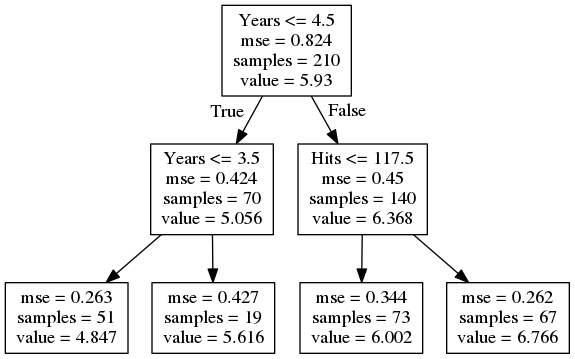

In [35]:
Image('Regtree.png')

<p><h2><font color = DarkBlue> Building a Decision Tree Model with all variables</font></h2></p>

In [36]:
model_all = DecisionTreeRegressor(max_depth=4) 

In [37]:
model_all.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
export_graphviz(model_all,out_file='Regtree.dot',feature_names=X_train.columns)

In [39]:
! dot -Tpng Regtree.dot -o Regtree.png

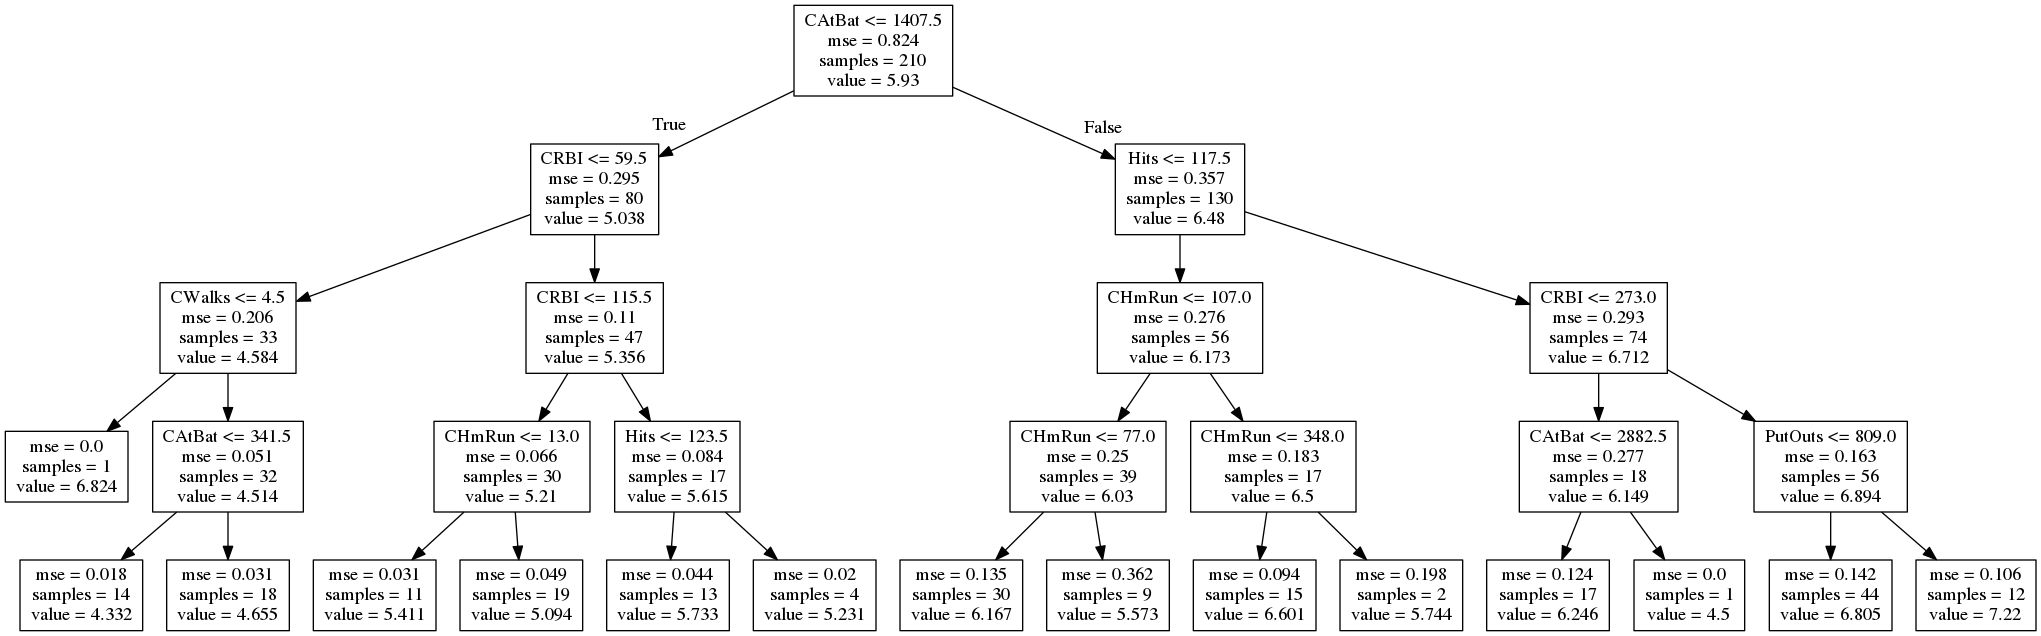

In [40]:
Image('Regtree.png')

In [41]:
model_all.score(X_train,y_train)

0.8759289524311671

In [42]:
y_pred_test = model_all.predict(X_test)

In [43]:
SSE_m1 = np.sum((y_pred_test-y_test)**2)
SSE_m1

11.941936647614737

In [44]:
SST_m1 = np.sum((y_test-np.mean(y_train))**2)
SST_m1

34.138208462647825

In [45]:
1-(SSE_m1/SST_m1)

0.6501885369678682

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.47467837468011675

<h3>Quiz</h3>

In [47]:
model1=DecisionTreeRegressor(min_samples_leaf=5) 

In [48]:
model1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
export_graphviz(model1,out_file='tree1.dot',feature_names=X_train.columns)

In [51]:
! dot -Tpng tree1.dot -o tree1.png

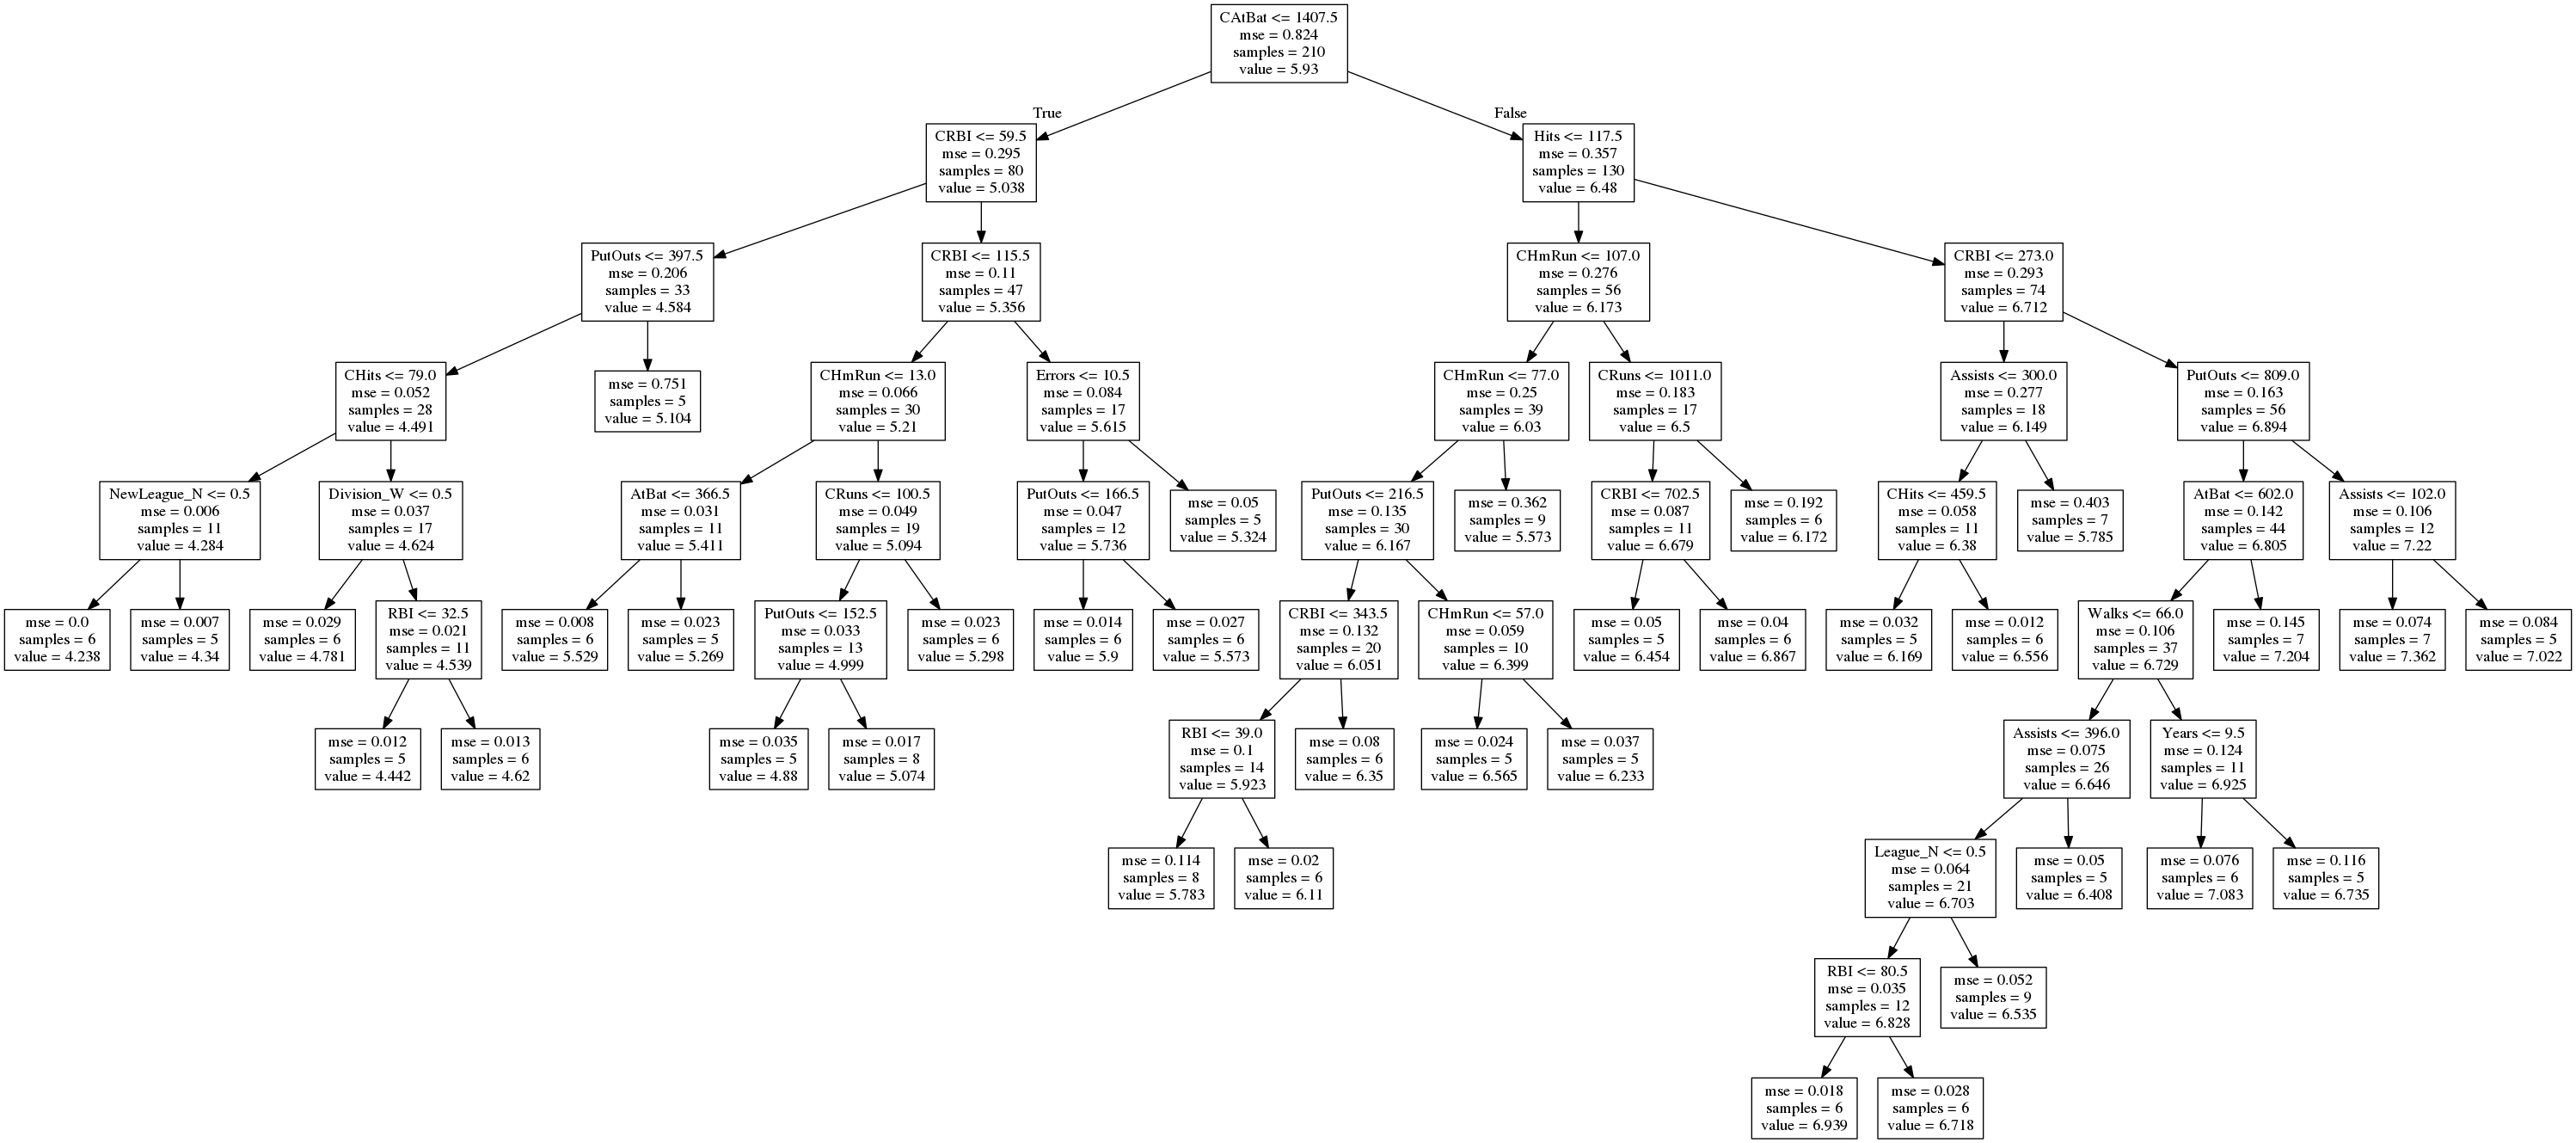

In [52]:
Image('tree1.png')

In [53]:
model1.score(X_train,y_train)

0.8903434219802548

In [54]:
y_pred_test1 = model1.predict(X_test)

In [55]:
SSE_1 = np.sum((y_pred_test1-y_test)**2)
SSE_1

25.584242896407318

In [56]:
SST_1 = np.sum((y_test-np.mean(y_train))**2)
SST_1

34.138208462647825

In [57]:
1-(SSE_1/SST_1)

0.25056867221371004

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred_test1))

0.694781666484628

<h3>##Building Model with min_samples_leaf size 25</h3>

In [59]:
model2=DecisionTreeRegressor(min_samples_leaf=25) 

In [60]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=25,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
export_graphviz(model2,out_file='tree2.dot',feature_names=X_train.columns)

In [62]:
! dot -Tpng tree2.dot -o tree2.png

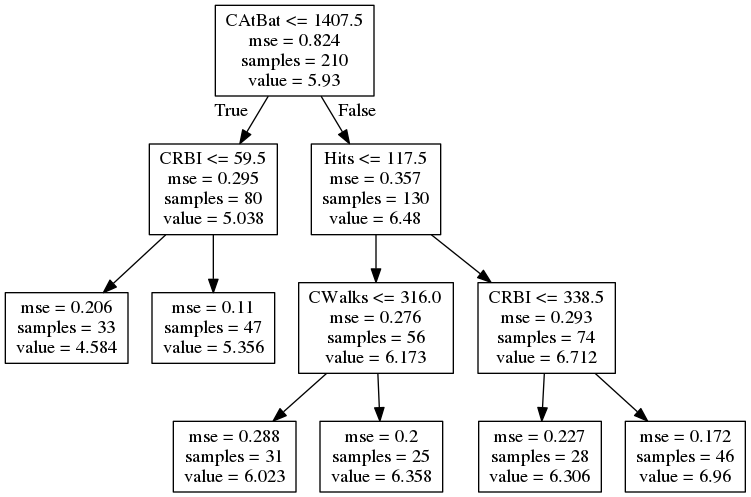

In [63]:
Image('tree2.png')

In [64]:
model2.score(X_train,y_train)

0.7679127393406748

In [65]:
y_pred_test2 = model2.predict(X_test)

In [66]:
SSE_2 = np.sum((y_pred_test2-y_test)**2)
SSE_2

21.954884970426292

In [67]:
SST_2 = np.sum((y_test-np.mean(y_train))**2)
SST_2

34.138208462647825

In [68]:
1-(SSE_2/SST_2)

0.35688233334071595

In [69]:
np.sqrt(mean_squared_error(y_test,y_pred_test2))

0.6436172097213938

<h3> <font color ='blue'>Pruning a Tree</font></h3>

In [70]:
parameters = {'max_depth':[1,2,3,4,5,6]}

In [71]:
grid = GridSearchCV(model_all,parameters,cv=10,scoring='r2')

In [72]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [73]:
grid.best_params_

{'max_depth': 3}

In [74]:
grid.best_score_

0.6253509801384337

In [75]:
model_prune = DecisionTreeRegressor(max_depth=3)

In [76]:
model_prune.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [77]:
model_prune.score(X_train,y_train)

0.8149699817928924

In [78]:
y_pred_prune = model_prune.predict(X_test)

In [79]:
SSE_prune=np.sum((y_pred_prune-y_test)**2)
SSE_prune

10.48327937030807

In [80]:
SST_prune=np.sum((y_test-np.mean(y_train))**2)
SST_prune

34.138208462647825

In [81]:
1-(SSE_prune/SST_prune)

0.6929165342177137

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred_prune))

0.4447445603580518

In [83]:
model_prune.feature_importances_

array([0.        , 0.06584681, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.7305271 , 0.        , 0.01853295,
       0.03672056, 0.14837257, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [84]:
data = pd.Series(model_prune.feature_importances_,index=X_train.columns)
data

AtBat          0.000000
Hits           0.065847
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.000000
Years          0.000000
CAtBat         0.730527
CHits          0.000000
CHmRun         0.018533
CRuns          0.036721
CRBI           0.148373
CWalks         0.000000
PutOuts        0.000000
Assists        0.000000
Errors         0.000000
League_N       0.000000
Division_W     0.000000
NewLeague_N    0.000000
dtype: float64

In [85]:
data.sort_values(ascending=True, inplace=True)

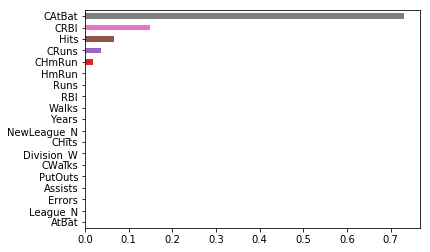

In [86]:
data.plot.barh()

In [87]:
export_graphviz(model_prune,out_file='Regtreeprune.dot',feature_names=X_train.columns)

In [ ]:
! dot -Tpng Regtreeprune.dot -o Regtreeprune.png`

In [ ]:
Image('Re')